In [3]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, GlobalMaxPooling1D, Conv1D, MaxPooling1D, Embedding
from tensorflow.keras.models import Model

In [4]:
!wget -nc https://lazyprogrammer.me/course_files/spam.csv

File ‘spam.csv’ already there; not retrieving.



In [5]:
df = pd.read_csv('spam.csv', encoding = 'ISO_8859_1')

In [6]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [7]:
df = df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis =1)

In [8]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
#rename columns
df.columns = ['labels', 'data']
df

,labels,data
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [10]:
#create binary labels
df['b_labels'] = df['labels'].map({'ham': 0, 'spam': 1})
Y = df['b_labels'].values


In [11]:
#split up the data
df_train, df_test, Ytrain, Ytest = train_test_split(df['data'], Y, test_size = 0.33)

In [12]:
MAX_VOCAB_SIZE = 20000
tokenizer = Tokenizer(num_words = MAX_VOCAB_SIZE)
tokenizer.fit_on_texts(df_train)
sequences_train = tokenizer.texts_to_sequences(df_train)
sequences_test = tokenizer.texts_to_sequences(df_test)

In [13]:
word2idx = tokenizer.word_index
V = len(word2idx)
print("Found %s unique tokens" %V)

Found 7231 unique tokens


In [14]:
data_train = pad_sequences(sequences_train)
print("Shape of data train tensor: ",data_train.shape)

T = data_train.shape[1]

Shape of data train tensor:  (3733, 162)


In [15]:
data_test = pad_sequences(sequences_test, maxlen = T)
print("Shape of data test tensor: ",data_test.shape)

Shape of data test tensor:  (1839, 162)


In [21]:
# create the model

# choose embedding dimensionality
D = 20

# Note: we actually want the  size of embedding to(V + 1) x D,
# because the first index starts from 1 and not 0
# Thus, if the final index of the embedding matrix is V,
# Then it actually must have size V + 1
i = Input(shape = (T,))
x = Embedding(V + 1, D)(i)
x = Conv1D(32, 3, activation = 'relu')(x)
x = MaxPooling1D(3)(x)
x = Conv1D(64, 3, activation = 'relu')(x)
x = MaxPooling1D(3)(x)
x = Conv1D(128, 3, activation = 'relu')(x)
x = GlobalMaxPooling1D()(x)
x = Dense(1, activation = 'sigmoid')(x)

model = Model(i, x)

In [23]:
#Compile and fit
model.compile(loss = 'binary_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

r = model.fit(
    data_train,
    Ytrain,
    epochs = 10,
    validation_data = (data_test, Ytest))

Epoch 1/10
117/117 [==============================] - 9s 50ms/step - loss: 0.3908 - accuracy: 0.8653 - val_loss: 0.3098 - val_accuracy: 0.8543
Epoch 2/10
117/117 [==============================] - 3s 23ms/step - loss: 0.1825 - accuracy: 0.9188 - val_loss: 0.1613 - val_accuracy: 0.9380
Epoch 3/10
117/117 [==============================] - 2s 17ms/step - loss: 0.0460 - accuracy: 0.9847 - val_loss: 0.0894 - val_accuracy: 0.9793
Epoch 4/10
117/117 [==============================] - 2s 17ms/step - loss: 0.0130 - accuracy: 0.9954 - val_loss: 0.0744 - val_accuracy: 0.9837
Epoch 5/10
117/117 [==============================] - 2s 16ms/step - loss: 0.0064 - accuracy: 0.9987 - val_loss: 0.0824 - val_accuracy: 0.9837
Epoch 6/10
117/117 [==============================] - 3s 24ms/step - loss: 0.0043 - accuracy: 0.9989 - val_loss: 0.0878 - val_accuracy: 0.9821
Epoch 7/10
117/117 [==============================] - 2s 20ms/step - loss: 0.0034 - accuracy: 0.9995 - val_loss: 0.0795 - val_accuracy: 0.9864

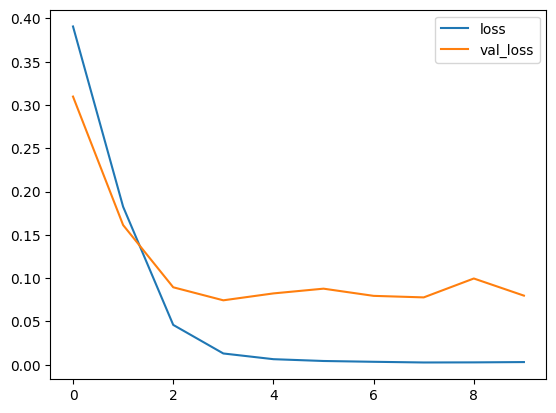

In [24]:
plt.plot(r.history['loss'], label ='loss')
plt.plot(r.history['val_loss'], label ='val_loss')
plt.legend()

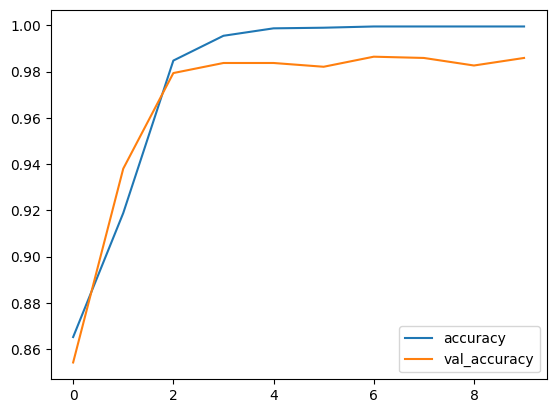

In [25]:
plt.plot(r.history['accuracy'], label ='accuracy')
plt.plot(r.history['val_accuracy'], label ='val_accuracy')
plt.legend()